### Marketing <a id='marketing'></a>

In this section, we calculate:
* [Marketing Costs](#marketing_costs)
* [Cost of Customer Acquisition](#CAC)
* [Return on Investment](#ROI)


#### Marketing Costs <a id='marketing_costs'></a>

Here, we answer the question:

How much money was spent overall?
How much money was spent per source?
How much money was spent over time?

In [31]:
# Overall cost spent
cost_updated = costs.copy()
display('The total amount spent is {}'.format(cost_updated.costs.sum()))

# Adding week and month to costs data
cost_updated['month'] = cost_updated['dt'].apply(lambda x: x.strftime('%Y-%m'))
#Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

display(cost_updated.head())

'The total amount spent is 329131.62'

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [32]:
# Marketing spend by source
source_costs = cost_updated.groupby(['source_id'])['costs'].sum().reset_index()

# Marketing spend by month and source_id
monthly_costs = cost_updated.groupby('month')['costs'].sum().reset_index()

# Graphical Representation of marketing spend by source
fig = px.bar(source_costs, x="source_id", y="costs",
              labels=dict(source_id='Source ID', costs='Marketing Spend'),
              title='Marketing Spend by Source'
             )
fig.show()

#Graphical Representation of marketing spend by month
fig = px.bar(monthly_costs, x="month", y="costs",
              labels=dict(month='Month', costs='Marketing Spend'),
              title='Marketing Spend by Month'
             )
fig.show()

#### Cost of Customer Acquisition <a id='CAC'></a>

We calculate:

How much customer acquisition cost from each of the sources and from each month

<b>Cost of Customer Acquisition by Month</b> 

,first_visit_month,uid,costs,num_of_buyers,revenue,CAC_by_buyers,CAC_by_visitors
0,2017-06,13259,18015.00,2923,40026.05,6.16,1.36
1,2017-07,13140,18240.59,2458,17812.11,7.42,1.39
2,2017-08,10181,14790.54,1721,13461.87,8.59,1.45
3,2017-09,16704,24368.91,3058,33682.56,7.97,1.46
4,2017-10,25977,36322.88,4678,27857.69,7.76,1.40
5,2017-11,27248,37907.88,4262,24426.72,8.89,1.39
6,2017-12,25268,38315.35,4074,31157.85,9.40,1.52
7,2018-01,22624,33518.52,3119,14546.82,10.75,1.48
8,2018-02,22197,32723.03,3186,15061.29,10.27,1.47
9,2018-03,20589,30415.27,2838,13770.16,10.72,1.48


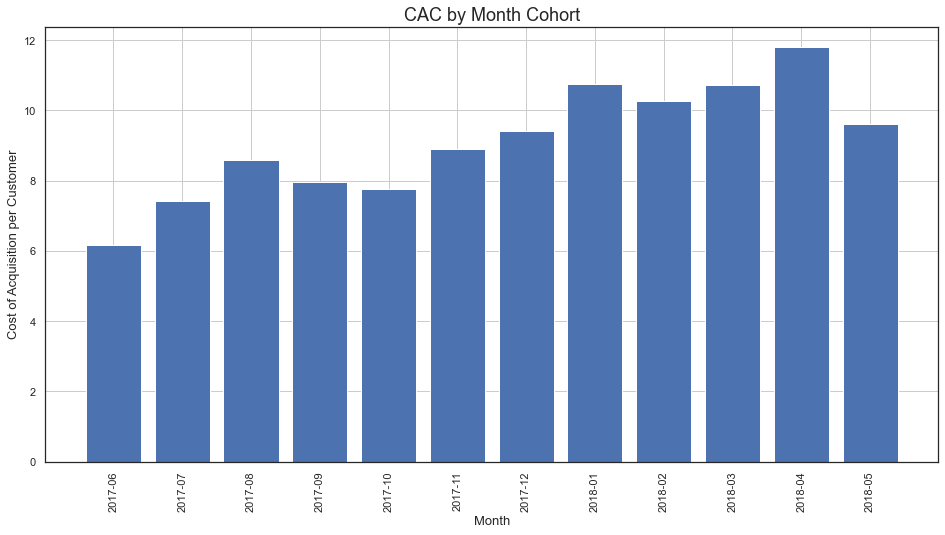

In [33]:
# Rename the columns for the purpose of merging the tables
monthly_costs.columns = ('first_visit_month', 'costs')

buyers_revenue = ltv_cohort_month.groupby(['first_visit_month', 'num_of_buyers'])['revenue'].sum().reset_index()

# CAC is cost / num_of_buyers. You can also compare cost / num_of_visitors
report_by_month = pd.merge \
        (pd.merge(total_users, monthly_costs, on='first_visit_month'), buyers_revenue, on='first_visit_month')
report_by_month['CAC_by_buyers'] = (report_by_month['costs'] / report_by_month['num_of_buyers']).round(2)
report_by_month['CAC_by_visitors'] = (report_by_month['costs'] / report_by_month['uid']).round(2)
display(report_by_month)

# Graphical representation of CAC by month cohort
plt.figure(figsize=(16, 8))
plt.bar(report_by_month['first_visit_month'], report_by_month['CAC_by_buyers'])
plt.title('CAC by Month Cohort', size=18)
plt.xlabel('Month', size=13)
plt.xticks(rotation=90)
plt.ylabel('Cost of Acquisition per Customer', size=13)
plt.grid(True)
plt.show()

<b>2. Cost of Customer Acquisition by Source</b> 

,device,end_ts,source_id,start_ts,uid,date,year_week,year_month,year,session_secs,session_mins,revenue
35,desktop,2017-10-14 18:15:00,5,2017-10-14 18:05:00,9781067627250906649,2017-10-14,2017-10-12,2017-10-01,2017,600,10.0,0.61
39,desktop,2018-03-28 22:35:00,3,2018-03-28 22:18:00,2489709968553445691,2018-03-28,2018-03-22,2018-03-01,2018,1020,17.0,0.91
45,desktop,2018-05-30 09:41:00,5,2018-05-30 09:40:00,14257835459223818569,2018-05-30,2018-05-24,2018-05-01,2018,60,1.0,1.47
55,desktop,2018-02-12 17:23:00,3,2018-02-12 17:23:00,14190261731932459700,2018-02-12,2018-02-08,2018-02-01,2018,0,0.0,4.89
57,desktop,2018-01-20 15:05:00,4,2018-01-20 14:32:00,12898717130063453708,2018-01-20,2018-01-18,2018-01-01,2018,1980,33.0,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...
176000,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,2017-12-04,2017-11-30,2017-12-01,2017,480,8.0,4.15
176004,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,2017-11-20,2017-11-16,2017-11-01,2017,660,11.0,3.67
176022,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,2017-11-29,2017-11-23,2017-11-01,2017,1260,21.0,3.05
176036,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23,2018-04-19,2018-04-01,2018,480,8.0,0.49


,source_id,uid,revenue,costs,CAC_by_buyers
0,1,1404,6207.709961,20833.27,14.84
1,2,1499,7056.649902,42806.04,28.56
2,3,5417,21745.080078,141321.63,26.09
3,4,5414,22412.179688,61073.60,11.28
4,5,3615,16062.769531,51757.10,14.32
5,7,1,1.220000,0.00,0.00
6,9,319,1036.199951,5517.49,17.30
7,10,767,1976.569946,5822.49,7.59


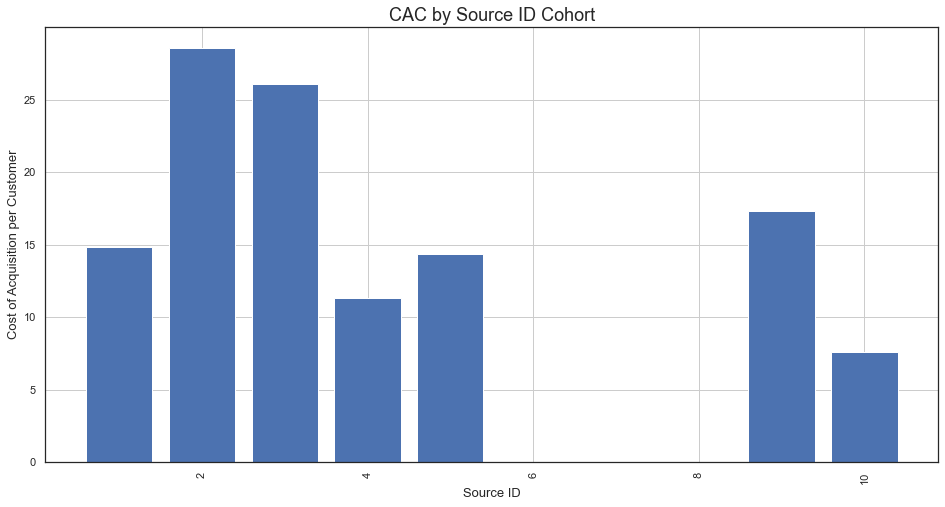

In [34]:
# Group visits df by 'uid', count the source_id, and query out and list users with only one source_id. 
single_source_userslists = (
                        ((visits.groupby('uid')['source_id']
                          .count().reset_index())
                         .query('source_id == 1'))['uid'].to_list()
                        )

# Get the full data of the users with single source id
single_source_data = visits[visits['uid'].isin(single_source_userslists)]

# Group cost_updated by source_id and sum the cost spent
total_cost_sourceId = cost_updated.groupby('source_id')['costs'].sum().reset_index()

# Group orders df by uid and sum the revenue to get the total revenue by each user
revenue_per_user = orders.groupby('uid')['revenue'].sum().reset_index()

# Join revenue_per_user to single_source_data df
single_source_data_updated = single_source_data.merge(revenue_per_user, on='uid', how='left')

# Remove users with NaN in the revenue column of the updated single_source_data to retain the buyers only
single_source_data_updated = single_source_data_updated[single_source_data_updated['revenue'].notna()]
display(single_source_data_updated)

report_by_source = (
        pd
        .merge(single_source_data_updated.groupby('source_id').agg({'uid': 'count', 'revenue': 'sum'}).reset_index(),
        total_cost_sourceId,
        on='source_id', how='left')
        )
report_by_source['revenue'] = report_by_source['revenue'].round(2)

report_by_source['CAC_by_buyers'] = (report_by_source['costs'] / report_by_source['uid']).round(2)

# Fill the NaNs in the costs and CAC_by_buyers with zero
report_by_source = report_by_source.fillna(0)
display(report_by_source)

# Graphical representation of CAC by source_id cohort
plt.figure(figsize=(16, 8))
plt.bar(report_by_source['source_id'], report_by_source['CAC_by_buyers'])
plt.title('CAC by Source ID Cohort', size=18)
plt.xlabel('Source ID', size=13)
plt.xticks(rotation=90)
plt.ylabel('Cost of Acquisition per Customer', size=13)
plt.grid(True)
plt.show()

#### Return on Investment <a id='ROI'></a>

How worthwhile was the investment?

age,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,0.67,0.12,0.02,0.12,0.04,0.06,0.02,0.03,0.01,0.01,0.01,0.02
2017-07,0.32,0.04,0.03,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.00,NaN
2017-08,0.32,0.03,0.02,0.02,0.01,0.01,0.01,0.04,0.01,0.00,NaN,NaN
2017-09,0.58,0.05,0.03,0.01,0.01,0.01,0.01,0.00,0.00,NaN,NaN,NaN
2017-10,0.31,0.04,0.01,0.01,0.01,0.01,0.00,0.00,NaN,NaN,NaN,NaN
2017-11,0.25,0.04,0.01,0.01,0.01,0.01,0.00,NaN,NaN,NaN,NaN,NaN
2017-12,0.37,0.02,0.01,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.18,0.02,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.19,0.02,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


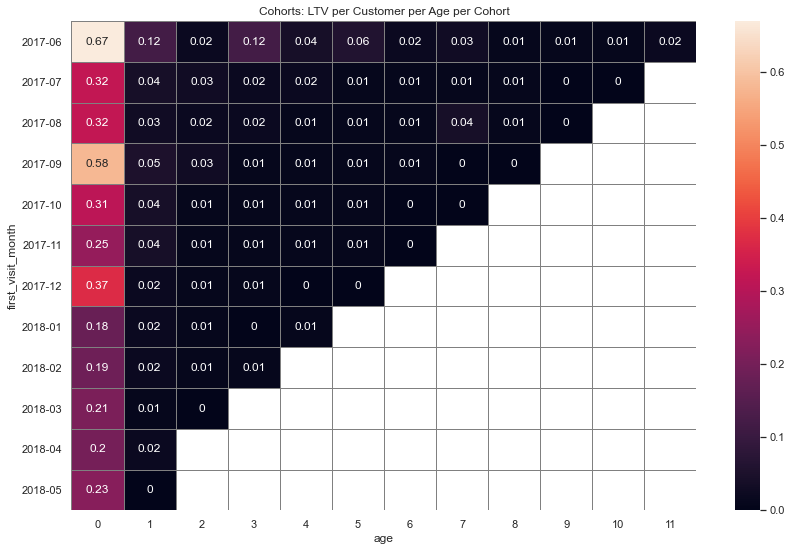

In [35]:
ltv_cohort_ = ltv_cohort_month.merge(report_by_month[['first_visit_month', 'CAC_by_buyers']], on='first_visit_month')
ltv_cohort_['romi'] = (ltv_cohort_['ltv'] / ltv_cohort_['CAC_by_buyers']).round(2)
ROMI = ltv_cohort_.pivot_table(
    index='first_visit_month',
    columns='age',
    values='romi',
    aggfunc='mean'
    )
display(ROMI)

# Graphical representation of the ROI per customer per month per cohort
sns.set(style='white')
plt.figure(figsize=(14, 9))
plt.title('Cohorts: LTV per Customer per Age per Cohort')
sns.heatmap(ROMI, annot=True, linewidths=1, linecolor='gray')
plt.yticks(rotation=360)
plt.show()